In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.dummy import DummyClassifier
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('NBATeamData20192020.csv')
df.rename(columns = {'Unnamed: 0':'Team','Unnamed: 1':'TS%', 'Unnamed: 2':'NetRtg', 'Unnamed: 3': 'Modified OPP EFG%','Unnamed: 4' : 'Net Shooting%','Unnamed: 5' : 'Predictor' , 'Unnamed: 6' : 'Made the playoffs in 2020?'},inplace=True)
df.drop(0,axis=0,inplace=True)
df

,Team,TS%,NetRtg,Modified OPP EFG%,Net Shooting%,Predictor,Made the playoffs in 2020?
1,Hawks,55.4,-7.4,-54.3,1.1,-6.3,No
2,Celtics,57,6.3,-50.9,6.1,12.4,Yes
3,Nets,55.4,-0.5,-51.1,4.3,3.8,Yes
4,Hornets,53.9,-7,-54.6,-0.7,-7.7,No
5,Bulls,54.7,-3.1,-54.6,0.1,-3,No
6,Cavaliers,55.3,-7.9,-56,-0.7,-8.6,No
7,Mavericks,58.1,4.8,-52.5,5.6,10.4,Yes
8,Nuggets,56.7,2.2,-53.3,3.4,5.6,Yes
9,Pistons,56.1,-3.5,-54.1,2,-1.5,No
10,Warriors,54,-8.6,-55.3,-1.3,-9.9,No


In [70]:
df_new.isnull().sum()

Team                          0
TS%                           0
NetRtg                        0
Modified OPP EFG%             0
Made the playoffs in 2020?    0
dtype: int64

In [3]:
df_new = df.copy()
df_new['Made the playoffs in 2020?']= df_new['Made the playoffs in 2020?'].map({'Yes':1, 'No':0})
df_new

,Team,TS%,NetRtg,Modified OPP EFG%,Net Shooting%,Predictor,Made the playoffs in 2020?
1,Hawks,55.4,-7.4,-54.3,1.1,-6.3,0
2,Celtics,57,6.3,-50.9,6.1,12.4,1
3,Nets,55.4,-0.5,-51.1,4.3,3.8,1
4,Hornets,53.9,-7,-54.6,-0.7,-7.7,0
5,Bulls,54.7,-3.1,-54.6,0.1,-3,0
6,Cavaliers,55.3,-7.9,-56,-0.7,-8.6,0
7,Mavericks,58.1,4.8,-52.5,5.6,10.4,1
8,Nuggets,56.7,2.2,-53.3,3.4,5.6,1
9,Pistons,56.1,-3.5,-54.1,2,-1.5,0
10,Warriors,54,-8.6,-55.3,-1.3,-9.9,0


([<matplotlib.axis.XTick at 0x7ff7b2085710>,
 <a list of 7 Text xticklabel objects>)

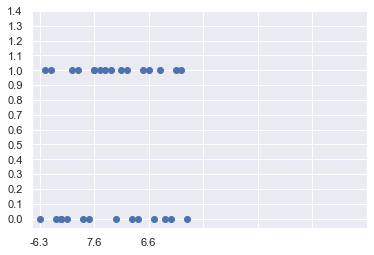

In [4]:
#sns.relplot(x="Predictor Variable", y="Made the playoffs in 2020?", hue="origin", size="weight",
y=df_new['Made the playoffs in 2020?']
x1=df_new['Predictor']
plt.scatter(x1,y)
plt.yticks(np.arange(0, 1.5,0.1))
plt.xticks(np.arange(0,70,10))

In [5]:
df_new.drop(['Predictor','Net Shooting%'], axis=1, inplace=True)
df_new

,Team,TS%,NetRtg,Modified OPP EFG%,Made the playoffs in 2020?
1,Hawks,55.4,-7.4,-54.3,0
2,Celtics,57,6.3,-50.9,1
3,Nets,55.4,-0.5,-51.1,1
4,Hornets,53.9,-7,-54.6,0
5,Bulls,54.7,-3.1,-54.6,0
6,Cavaliers,55.3,-7.9,-56,0
7,Mavericks,58.1,4.8,-52.5,1
8,Nuggets,56.7,2.2,-53.3,1
9,Pistons,56.1,-3.5,-54.1,0
10,Warriors,54,-8.6,-55.3,0


In [12]:
x=df_new[['TS%','NetRtg','Modified OPP EFG%']]
y=df_new['Made the playoffs in 2020?']
len(x)

30

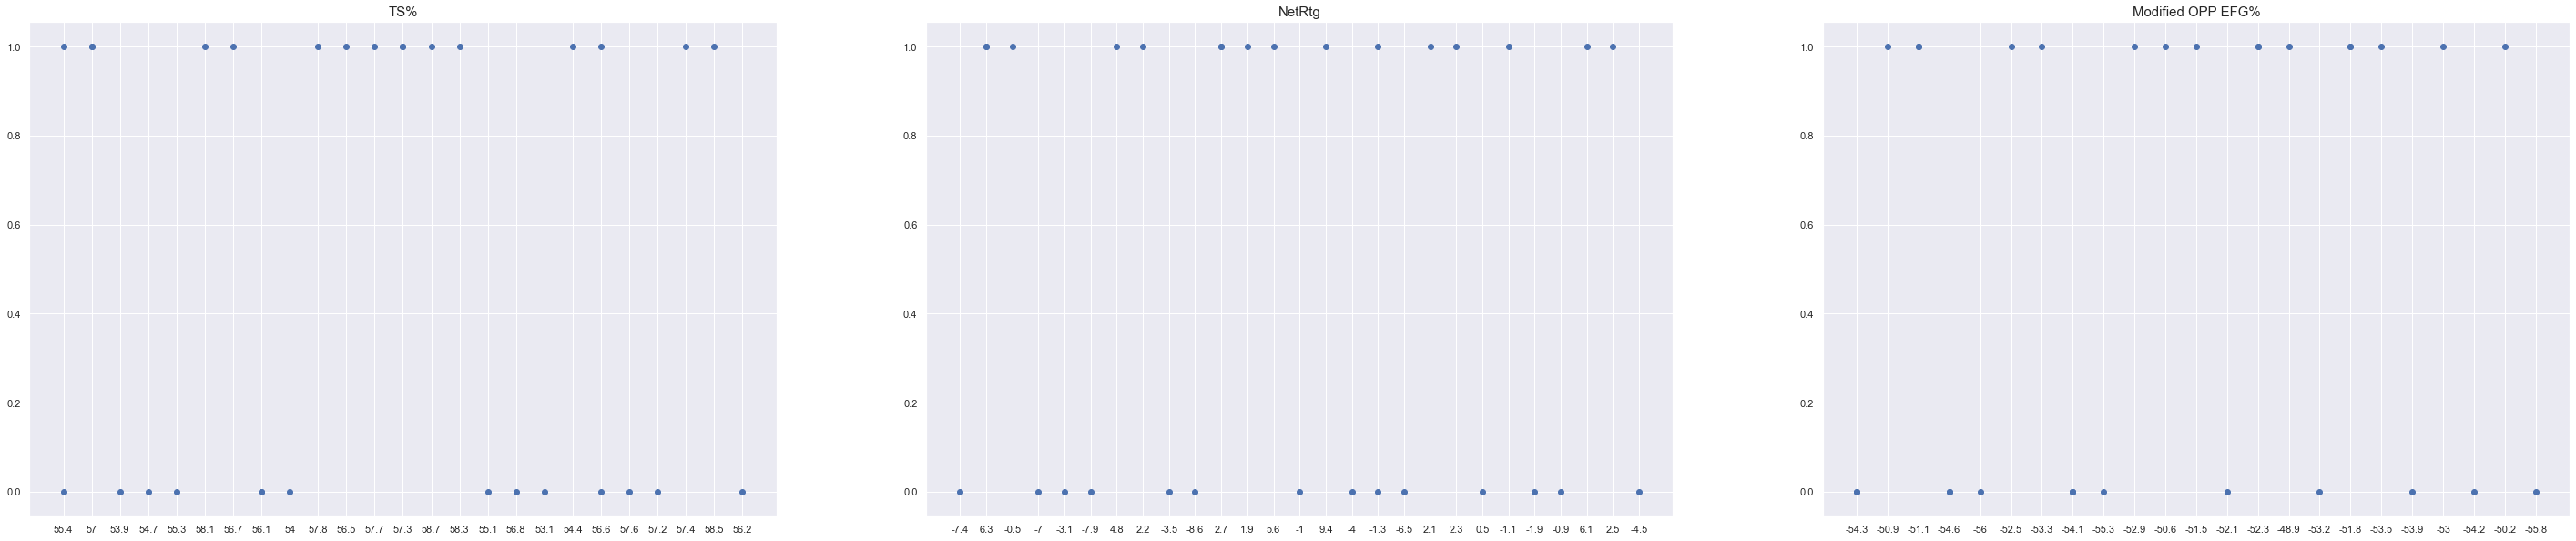

In [14]:
n=1
for i in ['TS%','NetRtg','Modified OPP EFG%']:
    plt.figure(1, figsize = (50,10))
    plt.subplot(1,3,n)
    plt.scatter(df_new[i],y)
    plt.title('{}'.format(i),fontsize=15)
    n+=1
plt.show()

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3333, random_state=10) 

In [54]:
from sklearn.dummy import DummyClassifier
d = DummyClassifier()
d.fit(x_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='warn')

In [56]:
y_pred_dummy = d.predict(x_test)
pd.crosstab(y_test, y_pred_dummy)

col_0,0,1
Made the playoffs in 2020?,,
0,1,1
1,4,4


In [57]:
print(classification_report(y_test,y_pred_dummy))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.80      0.50      0.62         8

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.68      0.50      0.55        10



In [58]:
obj = LogisticRegression()
obj.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
y_pred=obj.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 1 1 1 1]


In [60]:
y_test

21    1
8     1
6     0
3     1
4     0
22    1
14    1
28    1
13    1
2     1
Name: Made the playoffs in 2020?, dtype: int64

In [61]:
obj.score(x_test,y_test)

0.9

In [62]:
(pd.crosstab(y_test, y_pred))

col_0,0,1
Made the playoffs in 2020?,,
0,2,0
1,1,7


In [123]:
obj.predict([[60.4,100,]])

array([1])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.88      0.93         8

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10



In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33333, random_state=10) 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
y_pred=obj.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [131]:
model.score(x_test,y_test)

0.8

In [132]:
(pd.crosstab(y_test, y_pred))

col_0,0,1
Made the playoffs in 2020?,,
0,2,0
1,1,7


In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.88      0.93         8

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10



In [145]:
#from sklearn.metrics import roc_curve, roc_auc_score
#dc_probs = d.predict_proba(x_test)[:,1]
#lr_probs = obj.predict_proba(x_test)[:,1]
#rf_probs = model.predict_proba(x_test)[:,1]